# MSE 491 Project - Application of Machine Learning Techniques to Analyze EEG Data of Epileptic and Non-Epileptic Patients
## Ricardo Bravo
## Jonathan Kiing 

In [ ]:
reset -f

In [ ]:
# Importing all the libraries used
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

#Import datasets from tensorflow
import tensorflow_datasets as tfds

In [ ]:
# LOAD CSV FILE 
csv_dataframe = pd.read_csv("EpilepticSeizure.csv")

In [ ]:
# Pre-process data 
from sklearn.model_selection import train_test_split

# Extract EEG Data
eeg_data = csv_dataframe.iloc[:,1:-1]

#########################################################################3#########################################################################
# LABEL SET #1 - Complete Extract labels (4 LABELS) 
# Close and opening of eyes are combined 
eeg_result = csv_dataframe.iloc[:,-1].values
eeg_result4 = []
arr_eeg_data = np.array(eeg_result)

# Replace eye closed and open with eye movements => [1,2,3,4]
for x4 in range(0, len(arr_eeg_data)):
  if arr_eeg_data[x4] > 3:
    # eeg_result[x] = 0
    eeg_result4.append(4)
  else:
    eeg_result4.append(arr_eeg_data[x4])

eeg_result4 = np.array(eeg_result4)
##################################################################################################################################################
# LABEL SET #2 - Reduced # of labels, change 2,3,4, and 5 to 0 since they are classified as non-epileptic
temp_result = []
for x in range(0, len(eeg_result)):
  if eeg_result[x] != 1:
    # eeg_result[x] = 0
    temp_result.append(0)
  else:
    temp_result.append(1)

temp_result = np.array(temp_result)
##################################################################################################################################################
# COMPLETE LABELS 
train_data4, test_data4, train_labels4, test_labels4 = train_test_split(eeg_data, eeg_result4, test_size = 0.2, random_state = 2)

# Split data into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(eeg_data, temp_result, test_size = 0.2, random_state = 2)

# SIMPLIFIED - Convert all to numpy array for easier processing 
train_data = np.array(x_train)
test_data = np.array(x_test)
train_labels = np.array(y_train)
test_labels = np.array(y_test)

# # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
train_data4 = pd.DataFrame(StandardScaler().fit_transform(train_data4))
test_data4 = pd.DataFrame(StandardScaler().fit_transform(test_data4))

# Basic Feed-Forwrd Neural Network Model

In [ ]:
# CREATE MODEL 
NN_Model1 = tf.keras.models.Sequential()
NN_Model1.add(tf.keras.layers.Dense(500, input_shape=(178,), activation="relu", name="InputToHidden")
)
NN_Model1.add(tf.keras.layers.Dense(5, activation="softmax", name="Layer3")
)

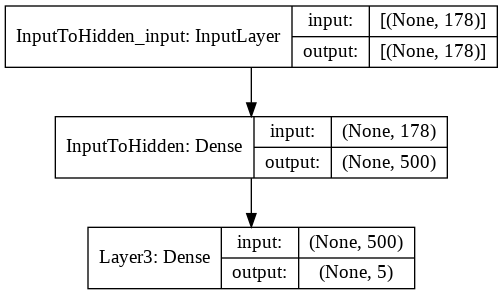

In [ ]:
tf.keras.utils.plot_model(
    NN_Model1,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
NN_Model1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
Model1_Evaluate = NN_Model1.fit(train_data4, train_labels4 , epochs=10, validation_data=(test_data4, test_labels4))

Epoch 1/10
288/288 [==============================] - 1s 4ms/step - loss: 1.1017 - accuracy: 0.5218 - val_loss: 0.7481 - val_accuracy: 0.6926
Epoch 2/10
288/288 [==============================] - 1s 3ms/step - loss: 0.6650 - accuracy: 0.7151 - val_loss: 0.6356 - val_accuracy: 0.7322
Epoch 3/10
288/288 [==============================] - 1s 3ms/step - loss: 0.5659 - accuracy: 0.7460 - val_loss: 0.6180 - val_accuracy: 0.7252
Epoch 4/10
288/288 [==============================] - 1s 3ms/step - loss: 0.4990 - accuracy: 0.7766 - val_loss: 0.5747 - val_accuracy: 0.7452
Epoch 5/10
288/288 [==============================] - 1s 3ms/step - loss: 0.4720 - accuracy: 0.7855 - val_loss: 0.5985 - val_accuracy: 0.7404
Epoch 6/10
288/288 [==============================] - 1s 3ms/step - loss: 0.4552 - accuracy: 0.7970 - val_loss: 0.5629 - val_accuracy: 0.7574
Epoch 7/10
288/288 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8071 - val_loss: 0.6039 - val_accuracy: 0.7665
Epoch 

In [ ]:
# Model Evaluate 
NN_Model1.evaluate(test_data4,test_labels4)

72/72 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.7709


[0.5381131172180176, 0.7708695530891418]

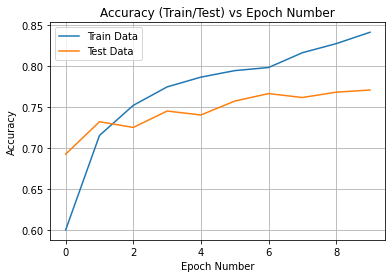

In [ ]:
# Plotting the Basic Feed-Forward Neural Network
trainAccuracyData = Model1_Evaluate.history['accuracy']
testAccuracyData = Model1_Evaluate.history['val_accuracy']

plt.plot(trainAccuracyData, label = "Train Data")
plt.plot(testAccuracyData, label = "Test Data")
plt.grid(axis='both')
plt.title("Accuracy (Train/Test) vs Epoch Number")
plt.xlabel("Epoch Number")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.show()

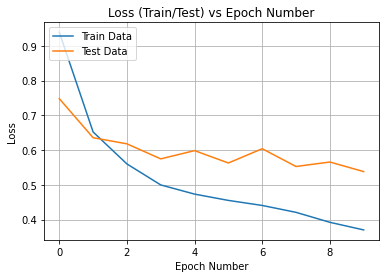

In [ ]:
# Plotting the Basic Feed-Forward Neural Network
trainLossData = Model1_Evaluate.history['loss']
testLossData = Model1_Evaluate.history['val_loss']

plt.plot(trainLossData, label = "Train Data")
plt.plot(testLossData, label = "Test Data")
plt.grid(axis='both')
plt.title("Loss (Train/Test) vs Epoch Number")
plt.xlabel("Epoch Number")
plt.legend(loc="upper left")
plt.ylabel("Loss")
plt.show()

# CLASSIFICATION

## Logistic Regression


In [ ]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)
logreg.fit(train_data, train_labels)
y_pred_binary = logreg.predict(test_data)
labels = ['Non-Epileptic','Epileptic']

Confusion Matrix
 [[1827    2]
 [ 426   45]]
Accuracy: 0.8139130434782609
Precision: 0.8139130434782609
Recall: 0.8139130434782609
F1 Score: 0.8139130434782609


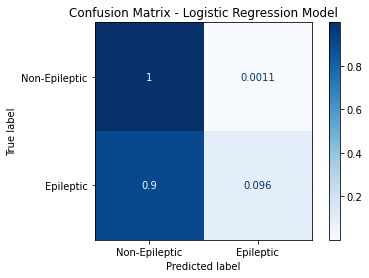

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusionMatrix1 = confusion_matrix(test_labels, y_pred_binary)

print('Confusion Matrix\n', confusionMatrix1)
plot_confusion_matrix1 = plot_confusion_matrix(logreg, test_data, test_labels, display_labels = labels, cmap = plt.cm.Blues, normalize = 'true')
plot_confusion_matrix1.ax_.set_title('Confusion Matrix - Logistic Regression Model')

# Calculate Evaluation Metrics
acc_temp = accuracy_score(test_labels, y_pred_binary)
precision_temp = precision_score(test_labels, y_pred_binary, average='micro')
recall_score_temp = recall_score(test_labels, y_pred_binary, average='micro')
f1_score_temp = f1_score(test_labels, y_pred_binary, average='micro')

# Print Evaluation Metrics
print("Accuracy:", acc_temp)
print("Precision:", precision_temp)
print("Recall:", recall_score_temp)
print("F1 Score:", f1_score_temp)

## Multi-class classification

In [ ]:
# Some Functions for Showing the Classifier Performance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

labels4 = ['EP', 'TL', 'HL', 'EM']
def classifier_performance(model,y_pred_x):
    print('Classification Report: \n', classification_report(test_labels4,y_pred_x,target_names=labels4))
    # Plot normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, test_data4, test_labels4,
                                     display_labels=labels4,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

## K-Nearest Neighbours

0.4817391304347826
[0.9829932  0.34015345 0.30111111 0.87037037]
[0.61358811 0.59111111 0.60491071 0.30290011]
[0.75555556 0.43181818 0.40207715 0.44940239]
Classification Report: 
               precision    recall  f1-score   support

          EP       0.98      0.61      0.76       471
          TL       0.34      0.59      0.43       450
          HL       0.30      0.60      0.40       448
          EM       0.87      0.30      0.45       931

    accuracy                           0.48      2300
   macro avg       0.62      0.53      0.51      2300
weighted avg       0.68      0.48      0.50      2300

Confusion matrix, without normalization
[[289  90  63  29]
 [  5 266 173   6]
 [  0 170 271   7]
 [  0 256 393 282]]
Normalized confusion matrix
[[0.61358811 0.1910828  0.13375796 0.06157113]
 [0.01111111 0.59111111 0.38444444 0.01333333]
 [0.         0.37946429 0.60491071 0.015625  ]
 [0.         0.27497315 0.42212675 0.30290011]]


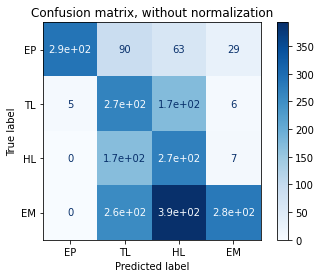

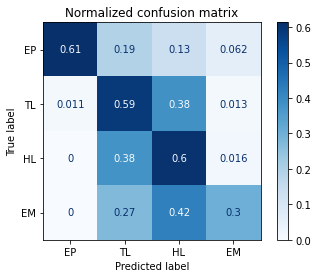

In [ ]:
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN = KNeighborsClassifier(n_neighbors=10)

# Train the Model
MODEL_KNN.fit(train_data4,train_labels4)

# Predict the Trained Model on our Test data
y_pred_KNN = MODEL_KNN.predict(test_data4)

# Calculate Evaluation Metrics
print("====================================")
acc_temp = accuracy_score(test_labels4, y_pred_KNN)
precision_temp = precision_score(test_labels4, y_pred_KNN, average=None)
recall_score_temp = recall_score(test_labels4, y_pred_KNN, average=None)
f1_score_temp = f1_score(test_labels4, y_pred_KNN, average=None)

print(acc_temp)
print(precision_temp)
print(recall_score_temp)
print(f1_score_temp)
print("====================================")

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN,y_pred_KNN)

0.5078260869565218
[0.98907104 0.35804878 0.33035714 0.91561181]
[0.76857749 0.81555556 0.49553571 0.23308271]
[0.86499403 0.49762712 0.39642857 0.37157534]
Classification Report: 
               precision    recall  f1-score   support

          EP       0.99      0.77      0.86       471
          TL       0.36      0.82      0.50       450
          HL       0.33      0.50      0.40       448
          EM       0.92      0.23      0.37       931

    accuracy                           0.51      2300
   macro avg       0.65      0.58      0.53      2300
weighted avg       0.71      0.51      0.50      2300

Confusion matrix, without normalization
[[362  69  25  15]
 [  3 367  78   2]
 [  0 223 222   3]
 [  1 366 347 217]]
Normalized confusion matrix
[[0.76857749 0.14649682 0.05307856 0.03184713]
 [0.00666667 0.81555556 0.17333333 0.00444444]
 [0.         0.49776786 0.49553571 0.00669643]
 [0.00107411 0.39312567 0.37271751 0.23308271]]


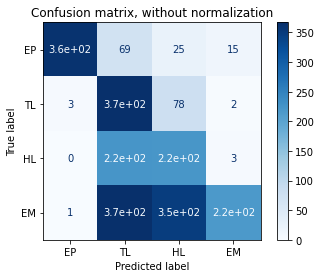

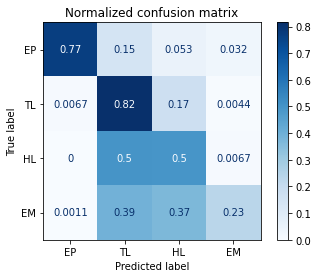

In [ ]:
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN2 = KNeighborsClassifier(n_neighbors=2)

# Train the Model
MODEL_KNN2.fit(train_data4,train_labels4)

# Predict the Trained Model on our Test data
y_pred_KNN2 = MODEL_KNN2.predict(test_data4)

# Calculate Evaluation Metrics
print("====================================")
acc_temp = accuracy_score(test_labels4, y_pred_KNN2)
precision_temp = precision_score(test_labels4, y_pred_KNN2, average=None)
recall_score_temp = recall_score(test_labels4, y_pred_KNN2, average=None)
f1_score_temp = f1_score(test_labels4, y_pred_KNN2, average=None)

print(acc_temp)
print(precision_temp)
print(recall_score_temp)
print(f1_score_temp)
print("====================================")
# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN2,y_pred_KNN2)

0.538695652173913
[0.99711816 0.37347932 0.35438144 0.87605634]
[0.73460722 0.68222222 0.61383929 0.33404941]
[0.84596577 0.4827044  0.44934641 0.4836703 ]
Classification Report: 
               precision    recall  f1-score   support

          EP       1.00      0.73      0.85       471
          TL       0.37      0.68      0.48       450
          HL       0.35      0.61      0.45       448
          EM       0.88      0.33      0.48       931

    accuracy                           0.54      2300
   macro avg       0.65      0.59      0.57      2300
weighted avg       0.70      0.54      0.55      2300

Confusion matrix, without normalization
[[346  64  36  25]
 [  1 307 134   8]
 [  0 162 275  11]
 [  0 289 331 311]]
Normalized confusion matrix
[[0.73460722 0.1358811  0.07643312 0.05307856]
 [0.00222222 0.68222222 0.29777778 0.01777778]
 [0.         0.36160714 0.61383929 0.02455357]
 [0.         0.3104189  0.35553169 0.33404941]]


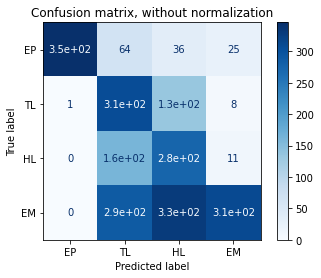

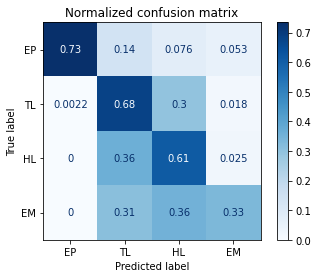

In [ ]:
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN3 = KNeighborsClassifier(n_neighbors=3)

# Train the Model
MODEL_KNN3.fit(train_data4,train_labels4)

# Predict the Trained Model on our Test data
y_pred_KNN3 = MODEL_KNN3.predict(test_data4)

## 
# Calculate Evaluation Metrics
print("====================================")
acc_temp = accuracy_score(test_labels4, y_pred_KNN3)
precision_temp = precision_score(test_labels4, y_pred_KNN3, average=None)
recall_score_temp = recall_score(test_labels4, y_pred_KNN3, average=None)
f1_score_temp = f1_score(test_labels4, y_pred_KNN3, average=None)

print(acc_temp)
print(precision_temp)
print(recall_score_temp)
print(f1_score_temp)
print("====================================")
# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN3,y_pred_KNN3)

0.4817391304347826
[0.9829932  0.34015345 0.30111111 0.87037037]
[0.61358811 0.59111111 0.60491071 0.30290011]
[0.75555556 0.43181818 0.40207715 0.44940239]
Classification Report: 
               precision    recall  f1-score   support

          EP       0.98      0.61      0.76       471
          TL       0.34      0.59      0.43       450
          HL       0.30      0.60      0.40       448
          EM       0.87      0.30      0.45       931

    accuracy                           0.48      2300
   macro avg       0.62      0.53      0.51      2300
weighted avg       0.68      0.48      0.50      2300

Confusion matrix, without normalization
[[325  75  45  26]
 [  6 325 114   5]
 [  0 190 242  16]
 [  0 277 375 279]]
Normalized confusion matrix
[[0.69002123 0.15923567 0.0955414  0.0552017 ]
 [0.01333333 0.72222222 0.25333333 0.01111111]
 [0.         0.42410714 0.54017857 0.03571429]
 [0.         0.29752954 0.4027927  0.29967777]]


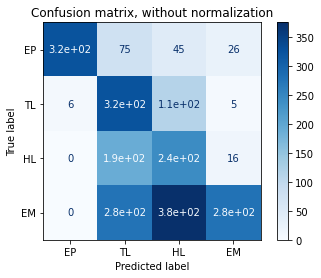

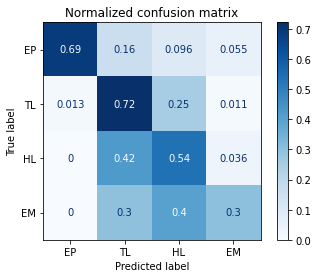

In [ ]:
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN4 = KNeighborsClassifier(n_neighbors=4)

# Train the Model
MODEL_KNN4.fit(train_data4,train_labels4)

# Predict the Trained Model on our Test data
y_pred_KNN4 = MODEL_KNN.predict(test_data4)

## 
# Calculate Evaluation Metrics
print("====================================")
acc_temp = accuracy_score(test_labels4, y_pred_KNN4)
precision_temp = precision_score(test_labels4, y_pred_KNN4, average=None)
recall_score_temp = recall_score(test_labels4, y_pred_KNN4, average=None)
f1_score_temp = f1_score(test_labels4, y_pred_KNN4, average=None)

print(acc_temp)
print(precision_temp)
print(recall_score_temp)
print(f1_score_temp)
print("====================================")
# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN4,y_pred_KNN4)

## Decision Tree Classifier

Classification Report: 
               precision    recall  f1-score   support

          EP       0.84      0.80      0.82       471
          TL       0.33      0.34      0.33       450
          HL       0.33      0.36      0.35       448
          EM       0.66      0.64      0.65       931

    accuracy                           0.56      2300
   macro avg       0.54      0.53      0.54      2300
weighted avg       0.57      0.56      0.56      2300

Confusion matrix, without normalization
[[377  38  27  29]
 [ 32 151 136 131]
 [ 13 124 162 149]
 [ 25 147 163 596]]
Normalized confusion matrix
[[0.80042463 0.08067941 0.05732484 0.06157113]
 [0.07111111 0.33555556 0.30222222 0.29111111]
 [0.02901786 0.27678571 0.36160714 0.33258929]
 [0.02685285 0.15789474 0.17508056 0.64017186]]


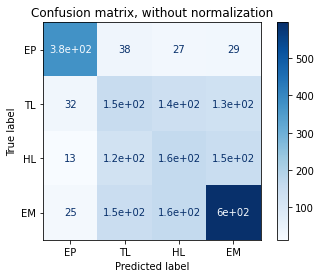

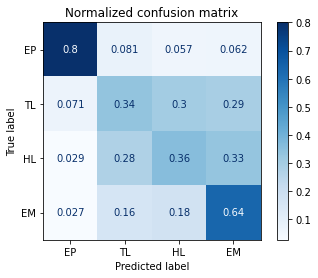

In [ ]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

# Instantiating the model (using the default parameters)
MODEL_DT = DecisionTreeClassifier()

# Train the Model
MODEL_DT.fit(train_data4,train_labels4)

# Save the Trained Model
# pickle.dump(MODEL_DT, open('DecisionTreeClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_DT = MODEL_DT.predict(test_data4)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_DT,y_pred_DT)

## Naive-Bayes

Classification Report: 
               precision    recall  f1-score   support

          EP       0.94      0.83      0.88       471
          TL       0.23      0.22      0.22       450
          HL       0.25      0.53      0.34       448
          EM       0.52      0.28      0.36       931

    accuracy                           0.43      2300
   macro avg       0.49      0.47      0.45      2300
weighted avg       0.50      0.43      0.44      2300

Confusion matrix, without normalization
[[391  78   1   1]
 [ 23  99 219 109]
 [  0  81 239 128]
 [  0 182 491 258]]
Normalized confusion matrix
[[0.83014862 0.1656051  0.00212314 0.00212314]
 [0.05111111 0.22       0.48666667 0.24222222]
 [0.         0.18080357 0.53348214 0.28571429]
 [0.         0.19548872 0.5273899  0.27712137]]


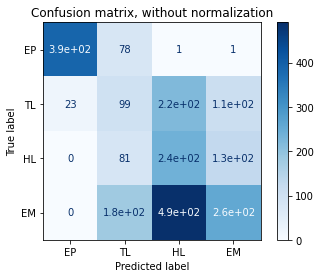

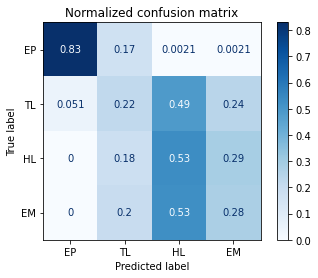

In [ ]:
# Import the class
from sklearn.naive_bayes import GaussianNB

# Instantiating the model (using the default parameters)
MODEL_GNB = GaussianNB()

# Train the Model
MODEL_GNB.fit(train_data4,train_labels4 )

# Predict the Trained Model on our Test data
y_pred_GNB = MODEL_GNB.predict(test_data4)

# Print the Classification Report and Confusion Matrix
classifier_performance
classifier_performance(MODEL_GNB,y_pred_GNB)

## Support Vector Machine

Classification Report: 
               precision    recall  f1-score   support

          EP       0.95      0.92      0.94       471
          TL       0.57      0.12      0.20       450
          HL       0.59      0.14      0.23       448
          EM       0.56      0.99      0.72       931

    accuracy                           0.64      2300
   macro avg       0.67      0.54      0.52      2300
weighted avg       0.65      0.64      0.57      2300

Confusion matrix, without normalization
[[434  15   5  17]
 [ 20  54  35 341]
 [  1  22  63 362]
 [  0   4   4 923]]
Normalized confusion matrix
[[0.92144374 0.03184713 0.01061571 0.03609342]
 [0.04444444 0.12       0.07777778 0.75777778]
 [0.00223214 0.04910714 0.140625   0.80803571]
 [0.         0.00429646 0.00429646 0.99140709]]


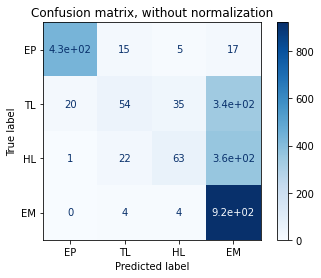

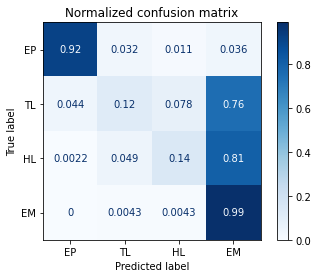

In [ ]:
# Import the class
from sklearn.svm import SVC

# Instantiating the model (using the default parameters)
MODEL_SVM = SVC()

# Train the Model
MODEL_SVM.fit(train_data4,train_labels4)

# Predict the Trained Model on our Test data
y_pred_SVM = MODEL_SVM.predict(test_data4)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_SVM,y_pred_SVM)